# Creating the Dataset

Objective is to retrieve at least 100 songs for each year, with preview-url of POP music between the years 1900 and 2021. 

In [1]:
import spotify.client as spotify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Calling Spotify API

Using the SearchAPI with the following parameters:

- Market: ES (Results for the Spain Market)
- Genre: POP (We are only taking into account POP evolution)
- Type: Track (We only want to retrieve track information)
- Year: This is variable between 1900 and 2021

The SearchAPI only returns a max of 50 items per call, so this will be a paginated call in order to retrieve at least 100 tracks with preview-url.

☝🏻 *WARNING: in order to use this API call you need to use the CLIENT_ID and CLIENT_SECRET from a Spotify App and place them into the .env file*

In [2]:
period = range(1900, 2021+1)
df = pd.DataFrame()
for year in period:
    tracks = spotify.search_with_preview(year)
    if len(tracks) == 0:
        continue
    df = df.append(tracks,ignore_index=True, sort=False)
df.to_csv(".csv/01_raw_data.csv", index=False, index_label=False)

Setting up the token search


## Discovery of data

Not all years, had tracks, and not all had at least 100 tracks. So here we narrow the conditions of our problem looking into the data we have available

In [3]:
# Adding release_year column from the album release date
df = pd.read_csv(".csv/01_raw_data.csv")
df.drop_duplicates(subset=["id"], inplace=True)
df["release_year"] = df["album.release_date"].apply(lambda x: x[:4])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10002 entries, 0 to 10064
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            10002 non-null  object
 1   uri                           10002 non-null  object
 2   name                          10002 non-null  object
 3   artists                       10002 non-null  object
 4   album.name                    10002 non-null  object
 5   album.release_date            10002 non-null  object
 6   album.release_date_precision  10002 non-null  object
 7   preview_url                   10002 non-null  object
 8   release_year                  10002 non-null  object
dtypes: object(9)
memory usage: 781.4+ KB


In [4]:
df.head()

,id,uri,name,artists,album.name,album.release_date,album.release_date_precision,preview_url,release_year
0,4skjZZo16hfFzziZMXY9aw,spotify:track:4skjZZo16hfFzziZMXY9aw,Cuando te veox,['Fer Palacio'],Cuando te veox,1900-01-01,day,https://p.scdn.co/mp3-preview/394dcb4b888e47fb...,1900
1,6YFTRjFcz1gwdDy2gVLIRW,spotify:track:6YFTRjFcz1gwdDy2gVLIRW,Mr Sandman,['The Four Aces'],The Best Of The Four Aces,1900-01-12,day,https://p.scdn.co/mp3-preview/edc7a73b3de30b6a...,1900
2,3ppjC6NXTGMfk0Zz3oV5Zx,spotify:track:3ppjC6NXTGMfk0Zz3oV5Zx,O Ferdovi A Mravenci,['DIVOKEJ BILL'],Divokej Bill,1900,year,https://p.scdn.co/mp3-preview/23423a5b53bec81c...,1900
3,3863SATRiCqsFn20M5fJIP,spotify:track:3863SATRiCqsFn20M5fJIP,"Kam? Tam, či tam?",['Horkýže Slíže'],Ritero Xaperle Bax,1900,year,https://p.scdn.co/mp3-preview/48ff6c34fc8b3c31...,1900
4,1SPFWPyjFtIcO6tCCKPGjz,spotify:track:1SPFWPyjFtIcO6tCCKPGjz,Vaha Musi,['DIVOKEJ BILL'],Divokej Bill,1900,year,https://p.scdn.co/mp3-preview/37c6e1591a6ddaf6...,1900


In [5]:
# tracks by release_year
groups = df.groupby("release_year")

### Number of tracks with preview-url by year (1900 - 2021)

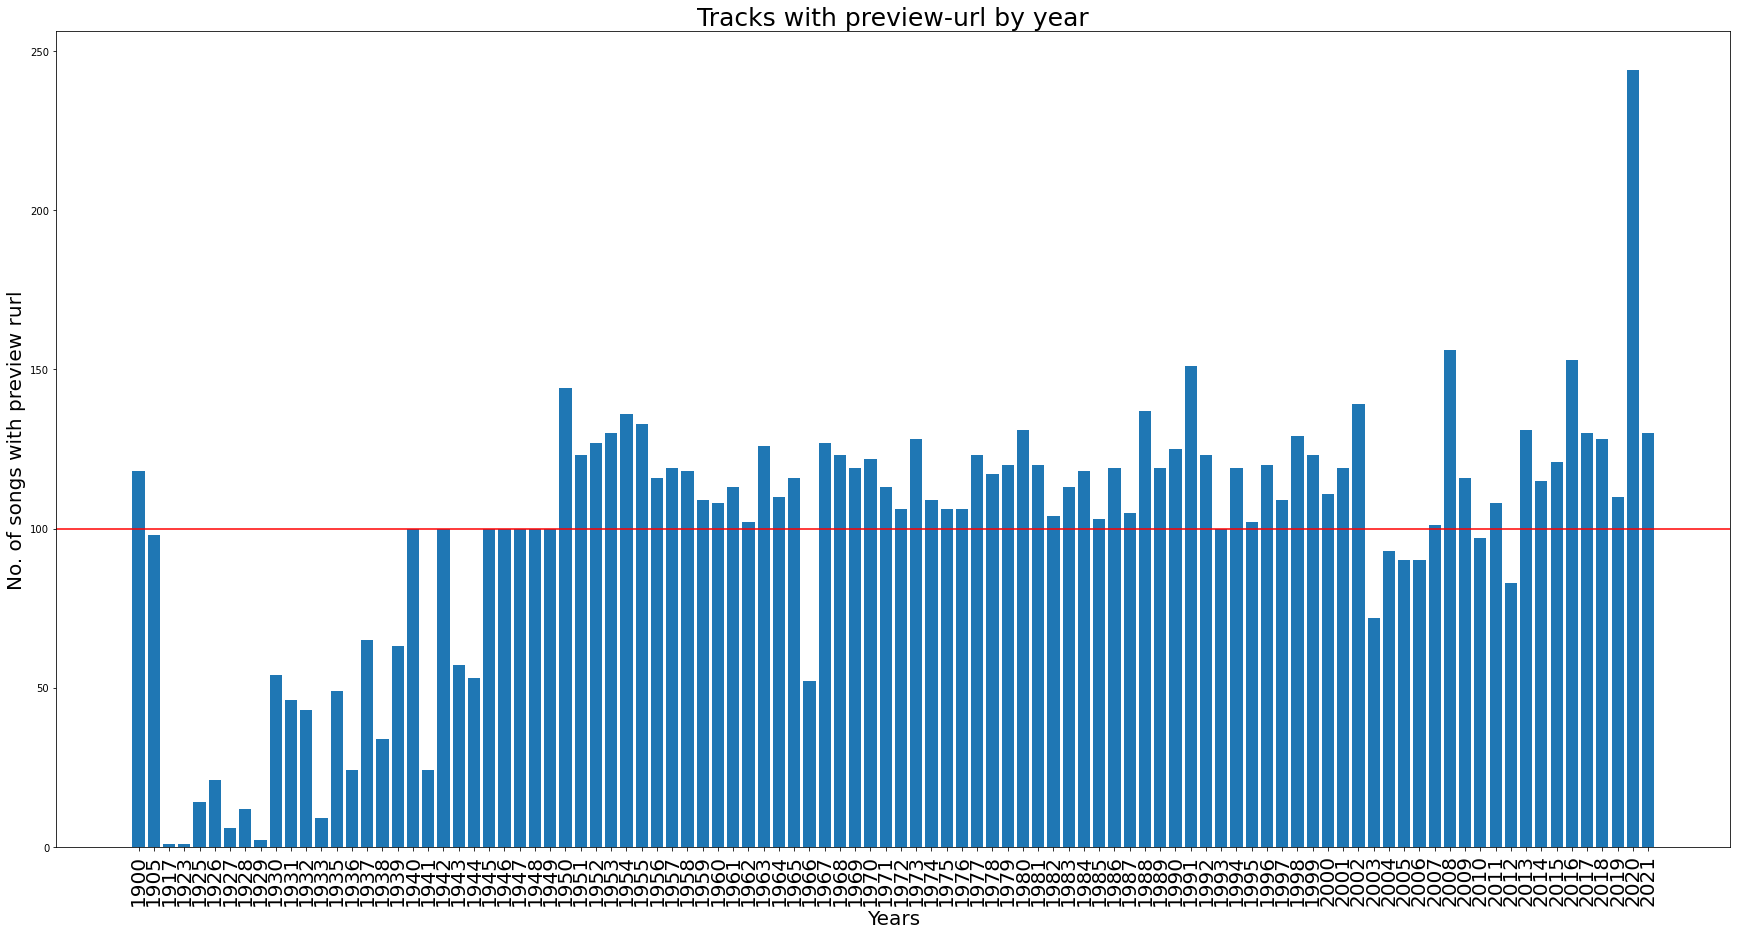

In [6]:
years = list()
count = list()
for k,v in groups:
    r, _ = v.shape
    years.append(k)
    count.append(r)

fig = plt.figure(figsize = (30, 15))
plt.bar(years, count)
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.xlabel("Years",fontsize=20)
plt.xticks(fontsize=20,rotation=90)

plt.ylabel("No. of songs with preview rurl",fontsize=20)
plt.title("Tracks with preview-url by year",fontsize=25)
plt.show()

### Number of tracks with preview-url by year (>= 100 items per year)

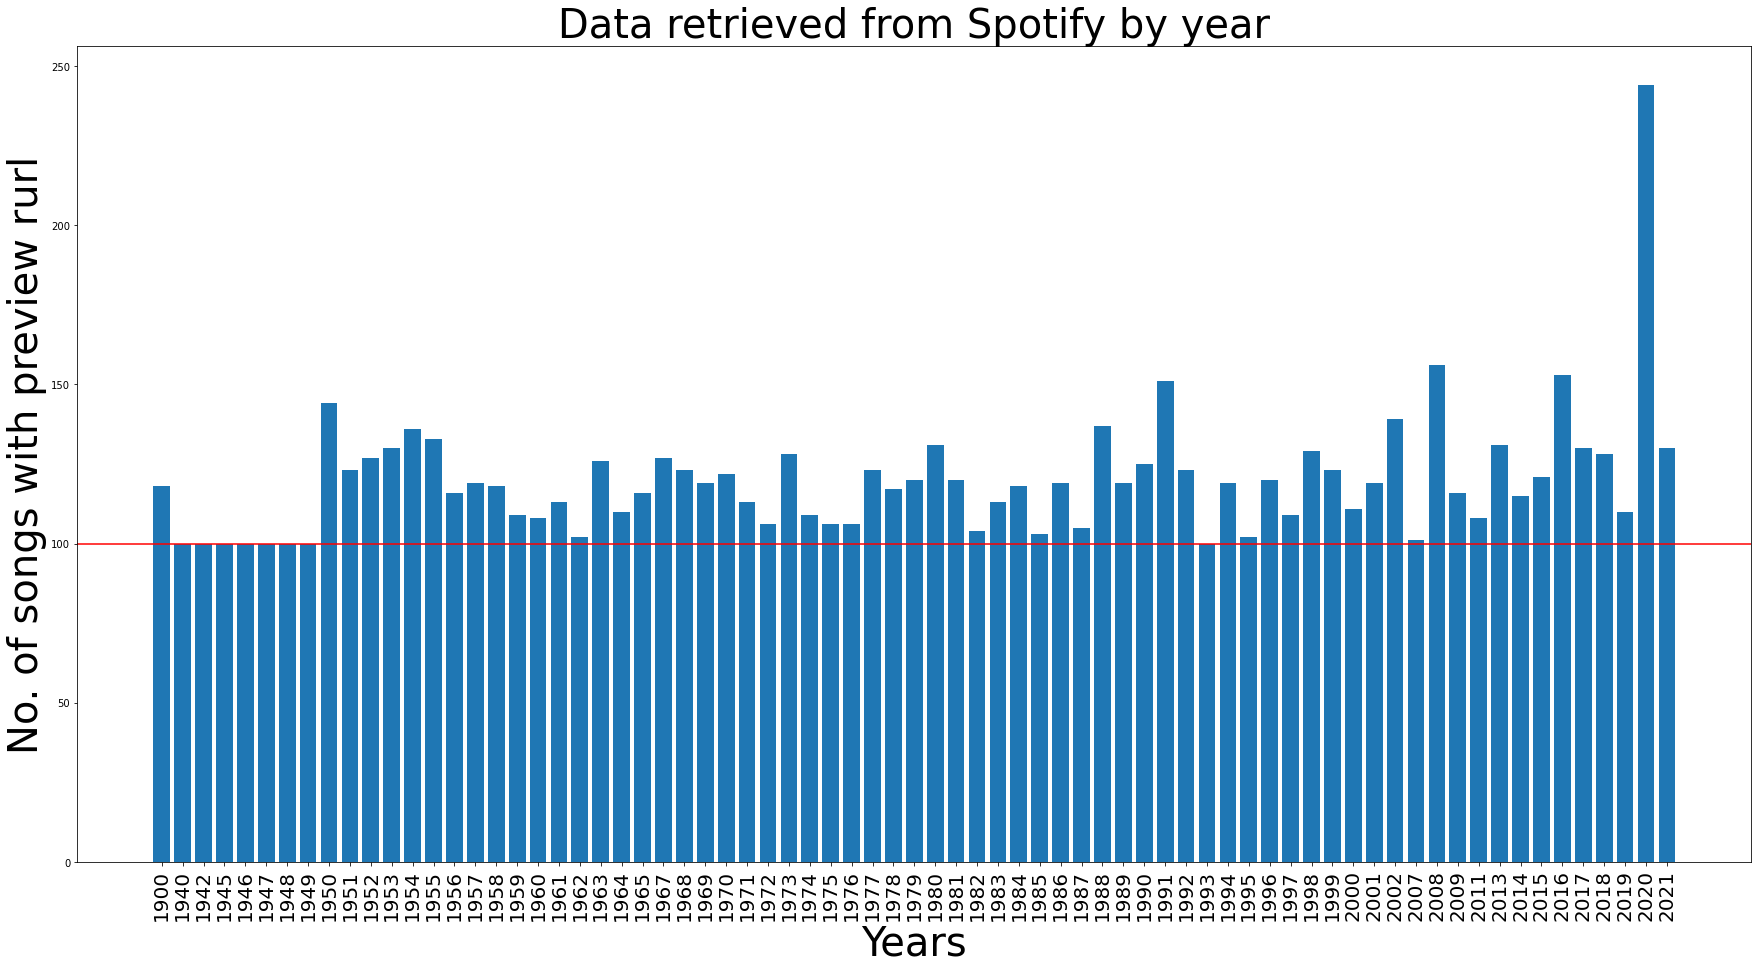

In [7]:
years = list()
count = list()
for k,v in groups:
    r, _ = v.shape
    if r >= 100:
        years.append(k)
        count.append(r)

fig = plt.figure(figsize = (30, 15))
plt.bar(years, count)
plt.axhline(y = 100, color = 'r', linestyle = '-')
plt.xticks(fontsize=20,rotation=90)
plt.xlabel("Years",fontsize=40)
plt.ylabel("No. of songs with preview rurl",fontsize=40)
plt.title("Data retrieved from Spotify by year", fontsize=40)
plt.show()

### 100 Tracks with preview-url per year (between 1945-2021)

In [8]:
final_range = range(1945,2021+1)
df = pd.DataFrame()
for k,v in groups:
    r, _ = v.shape
    if int(k) in final_range and r >= 100:
        df = df.append(v[:100])
df.to_csv(".csv/01_final_spotify_data.csv", index=False, index_label=False)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 996 to 10034
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            7000 non-null   object
 1   uri                           7000 non-null   object
 2   name                          7000 non-null   object
 3   artists                       7000 non-null   object
 4   album.name                    7000 non-null   object
 5   album.release_date            7000 non-null   object
 6   album.release_date_precision  7000 non-null   object
 7   preview_url                   7000 non-null   object
 8   release_year                  7000 non-null   object
dtypes: object(9)
memory usage: 546.9+ KB


In [10]:
df["release_year"].unique()

array(['1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952',
       '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960',
       '1961', '1962', '1963', '1964', '1965', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2007', '2008', '2009', '2011', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'], dtype=object)

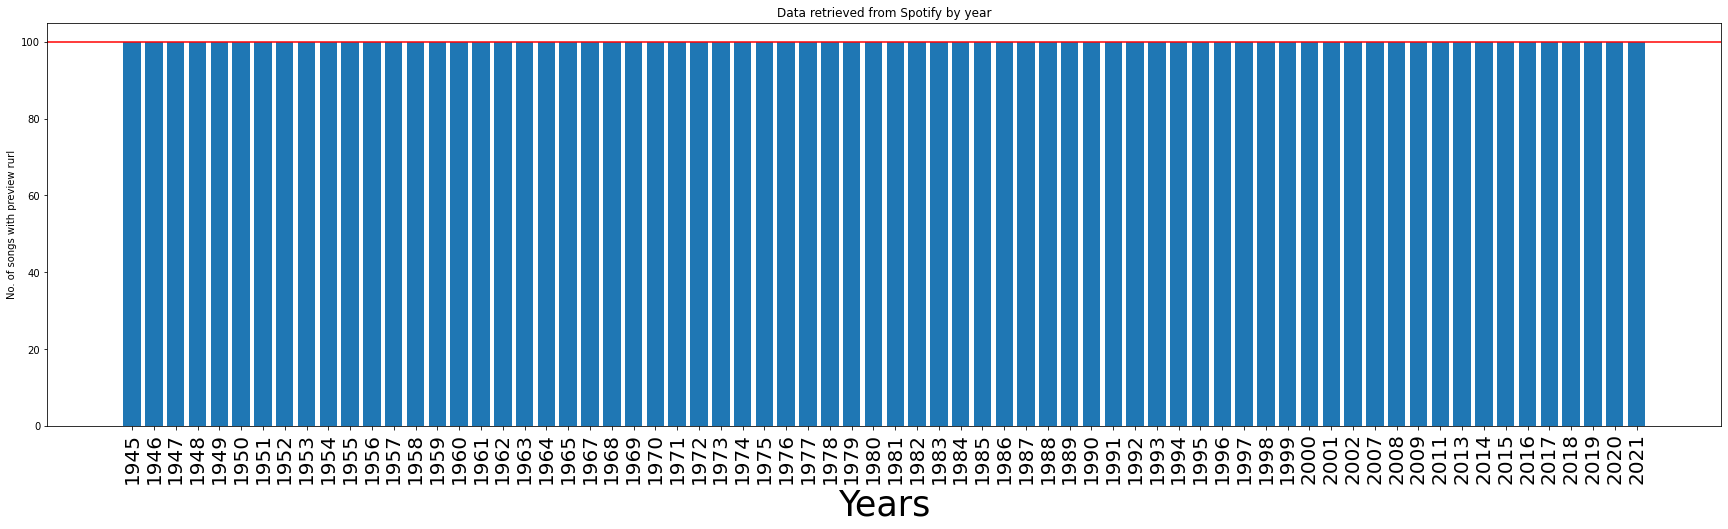

In [11]:
groups = df.groupby("release_year")
years = list()
count = list()
for k, v in groups:
    r, _ = v.shape
    years.append(k)
    count.append(r)

fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(bottom=0.6)
plt.bar(years, count)
plt.axhline(y=100, color='r', linestyle='-')
plt.xlabel("Years",fontsize=35)
plt.xticks(fontsize=20,rotation=90)
plt.ylabel("No. of songs with preview rurl")
plt.title("Data retrieved from Spotify by year")
plt.show()

## Problem statement

Create a ML model which identifies the decade of a song, using a dataset composed by 100 songs per year between 1945 and 2021.